In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações estéticas para as visualizações

sns.set_palette("tab20c")
sns.set_style("darkgrid")

In [22]:
df = pd.read_csv('housing.csv')

In [23]:
df.shape

(20640, 10)

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('housing.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'housing.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 10 columns


In [25]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
df.dropna(inplace = True)

In [29]:
df.duplicated().sum()

0

In [30]:
df.reset_index(inplace = True, drop = True)

In [31]:
dummies = pd.get_dummies(df['ocean_proximity'])
df = pd.concat([df, dummies], axis = 1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,False,True,False


In [32]:
df = df.drop(['ocean_proximity'], axis = 1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [33]:
df[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']] = df[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [34]:
df.describe().round(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000
mean,-119.5707,35.6332,28.6331,2636.5042,537.8706,1424.9469,499.4335,3.8712,206864.4132,0.4421,0.3179,0.0002,0.1111,0.1286
std,2.0036,2.1363,12.5918,2185.2696,421.3851,1133.2085,382.2992,1.8993,115435.6671,0.4967,0.4657,0.0156,0.3143,0.3348
min,-124.3500,32.5400,1.0000,2.0000,1.0000,3.0000,1.0000,0.4999,14999.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,-121.8000,33.9300,18.0000,1450.0000,296.0000,787.0000,280.0000,2.5637,119500.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,-118.4900,34.2600,29.0000,2127.0000,435.0000,1166.0000,409.0000,3.5365,179700.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,-118.0100,37.7200,37.0000,3143.0000,647.0000,1722.0000,604.0000,4.7440,264700.0000,1.0000,1.0000,0.0000,0.0000,0.0000
max,-114.3100,41.9500,52.0000,39320.0000,6445.0000,35682.0000,6082.0000,15.0001,500001.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [35]:
df.corr().round(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.0000,-0.9246,-0.1094,0.0455,0.0696,0.1003,0.0565,-0.0156,-0.0454,0.3208,-0.0553,0.0095,-0.4747,0.0462
latitude,-0.9246,1.0000,0.0119,-0.0367,-0.0670,-0.1090,-0.0718,-0.0796,-0.1446,-0.4469,0.3511,-0.0167,0.3588,-0.1613
housing_median_age,-0.1094,0.0119,1.0000,-0.3606,-0.3205,-0.2958,-0.3028,-0.1183,0.1064,0.0456,-0.2370,0.0171,0.2561,0.0208
total_rooms,0.0455,-0.0367,-0.3606,1.0000,0.9304,0.8573,0.9190,0.1979,0.1333,-0.0038,0.0265,-0.0076,-0.0236,-0.0087
total_bedrooms,0.0696,-0.0670,-0.3205,0.9304,1.0000,0.8777,0.9797,-0.0077,0.0497,0.0183,-0.0065,-0.0044,-0.0199,0.0007
population,0.1003,-0.1090,-0.2958,0.8573,0.8777,1.0000,0.9072,0.0051,-0.0253,0.0734,-0.0196,-0.0105,-0.0615,-0.0235
households,0.0565,-0.0718,-0.3028,0.9190,0.9797,0.9072,1.0000,0.0134,0.0649,0.0419,-0.0383,-0.0091,-0.0113,0.0021
median_income,-0.0156,-0.0796,-0.1183,0.1979,-0.0077,0.0051,0.0134,1.0000,0.6884,0.1687,-0.2375,-0.0093,0.0567,0.0274
median_house_value,-0.0454,-0.1446,0.1064,0.1333,0.0497,-0.0253,0.0649,0.6884,1.0000,0.2576,-0.4848,0.0235,0.1605,0.1404
<1H OCEAN,0.3208,-0.4469,0.0456,-0.0038,0.0183,0.0734,0.0419,0.1687,0.2576,1.0000,-0.6078,-0.0139,-0.3147,-0.3420


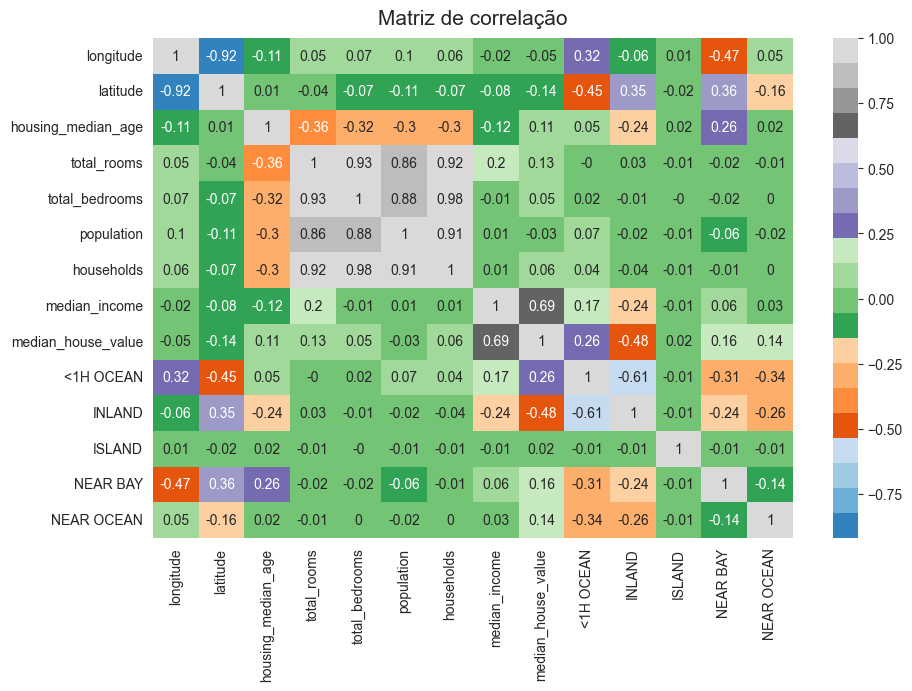

In [36]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.heatmap(df.corr().round(2), annot = True, cmap = 'tab20c')
ax.set_title('Matriz de correlação', fontsize = 15, pad = 10)
plt.show()

Text(0.5, 0, 'Valores em USD')

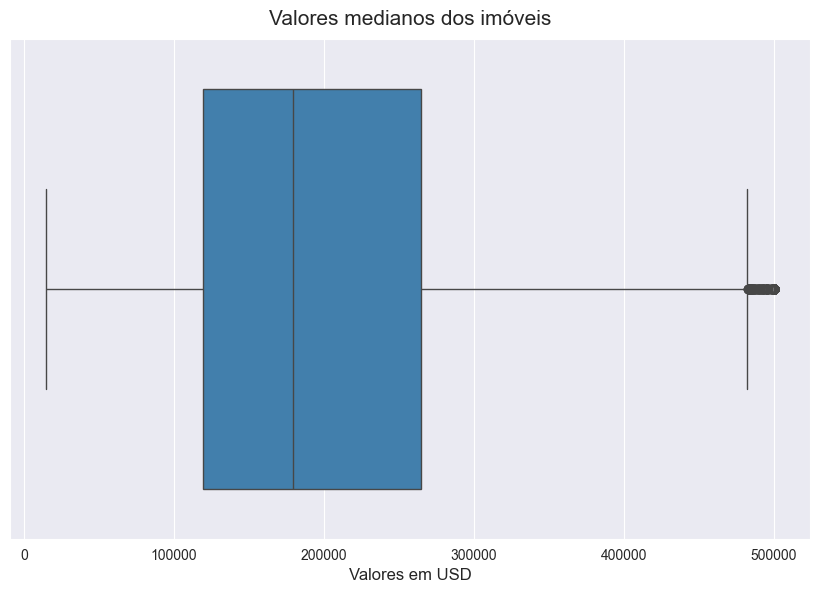

In [37]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df['median_house_value'], orient = 'h')
ax.set_title('Valores medianos dos imóveis', fontsize = 15, pad = 10)
ax.set_xlabel('Valores em USD', fontsize = 12)

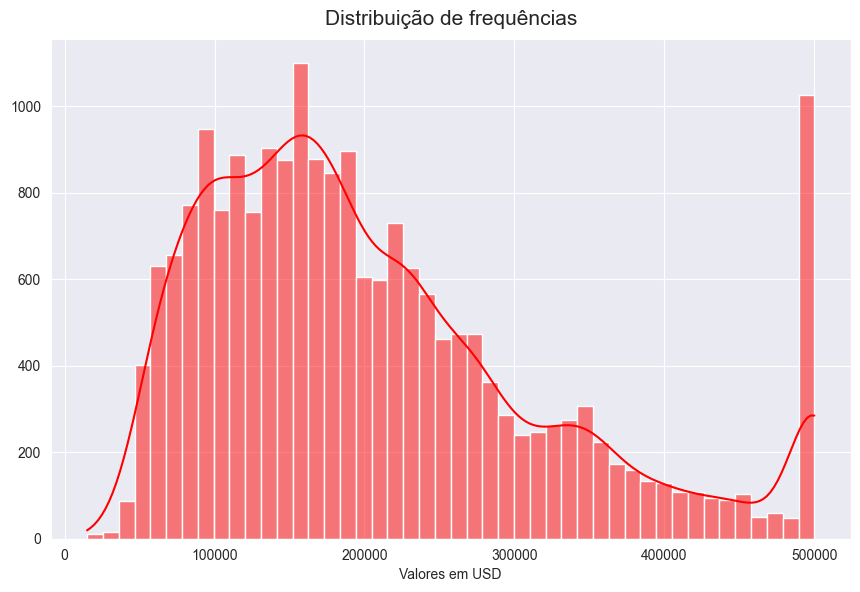

In [38]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.histplot(df['median_house_value'], kde = True, color = 'red')
ax.set_title('Distribuição de frequências', fontsize = 15, pad = 10)
ax.set_xlabel('Valores em USD')
ax.set_ylabel('')
plt.show()

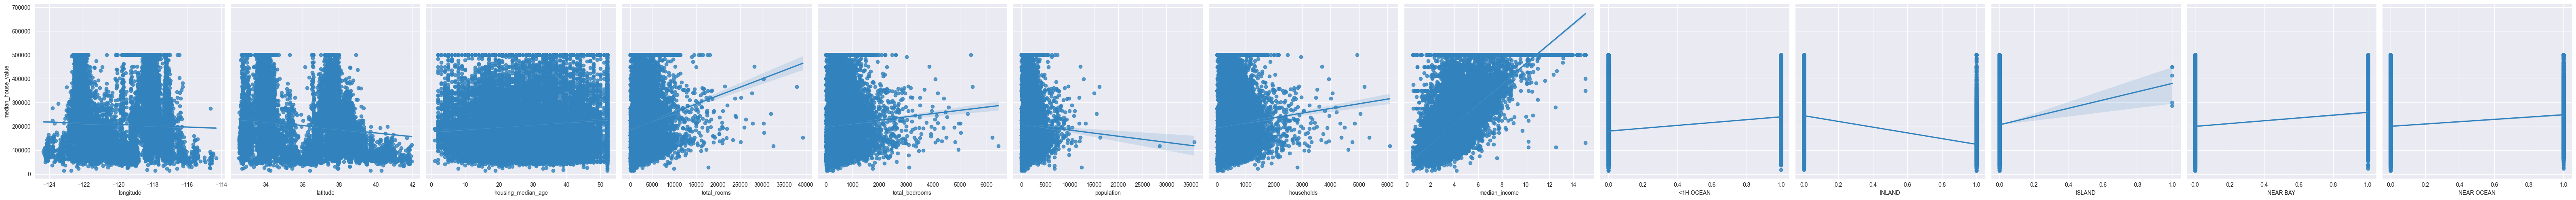

In [39]:
ax = sns.pairplot(data = df,
                  y_vars = 'median_house_value',
                  x_vars = ['longitude', 'latitude', 'housing_median_age',
                            'total_rooms','total_bedrooms', 'population',
                            'households', 'median_income', '<1H OCEAN',
                            'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
                  kind = 'reg',
                  height = 5)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y = df['median_house_value']

In [42]:
X = df.drop(['median_house_value'], axis = 1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)

In [45]:
import statsmodels.api as sm

In [46]:
X_train_constante = sm.add_constant(X_train)

In [47]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [48]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2475.
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:01:07   Log-Likelihood:            -2.0527e+05
No. Observations:               16346   AIC:                         4.106e+05
Df Residuals:                   16333   BIC:                         4.107e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.946e+06   8.22

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [50]:
modelo = LinearRegression()

In [51]:
modelo.fit(X_train, y_train)

LinearRegression()

In [52]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(4)))

R² = 0.6452


In [53]:
y_previsto = modelo.predict(X_test)

In [54]:
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(4)))

R² = 0.6507


In [55]:
entrada = X_test[0:1]
entrada

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
524,-122.25,37.77,52.0,2650.0,566.0,1468.0,567.0,3.0161,0,0,0,1,0


In [56]:
print('{0:.2f} USD'.format(modelo.predict(entrada)[0]))

228935.54 USD
